Visualisation des données immobilières

Ce notebook présente différentes visualisations des données DVF pour comprendre le marché immobilier.

 1. Configuration et chargement des données

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [4]:
# Configuration pour de meilleurs graphiques
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("Set2")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

In [13]:
project_root = r'C:\Users\Marouane\ImmoPredict'

# Essayer de charger les données depuis différentes sources possibles
# Commencer par les données nettoyées si elles existent
processed_path = os.path.join(project_root, 'data', 'processed', 'dvf_clean.csv')
features_path = os.path.join(project_root, 'data', 'processed', 'dvf_features.csv')
raw_path = os.path.join(project_root, 'data', 'raw', 'valeursfoncieres-2024.txt')

# Vérifier et charger le premier fichier disponible
if os.path.exists(features_path):
    print(f"Chargement des données avec features depuis {features_path}")
    df = pd.read_csv(features_path)
elif os.path.exists(processed_path):
    print(f"Chargement des données nettoyées depuis {processed_path}")
    df = pd.read_csv(processed_path)
elif os.path.exists(raw_path):
    print(f"Chargement des données brutes depuis {raw_path}")
    df = pd.read_csv(raw_path, sep='|', encoding='utf-8', nrows=50000)
    
    # Nettoyage basique pour la visualisation
    if 'Valeur fonciere' in df.columns and df['Valeur fonciere'].dtype == 'object':
        df['Valeur fonciere'] = df['Valeur fonciere'].str.replace(',', '.').astype(float)
else:
    print("Aucun fichier de données trouvé!")
    # Créer un petit dataset d'exemple pour éviter les erreurs
    df = pd.DataFrame({
        'Valeur fonciere': [100000, 200000, 300000],
        'Surface reelle bati': [50, 80, 120],
        'Code departement': ['75', '92', '69']
    })

# Vérification que les données sont chargées
print(f"Dimensions du dataset: {df.shape}")
print("Aperçu des premières lignes:")
display(df.head())

# Afficher les noms exacts des colonnes pour éviter les erreurs
print("\nNoms exacts des colonnes disponibles:")
for col in df.columns:
    print(f"- '{col}'")

Chargement des données nettoyées depuis C:\Users\Marouane\ImmoPredict\data\processed\dvf_clean.csv


C:\Users\Marouane\AppData\Local\Temp\ipykernel_16140\1001016298.py:15: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(processed_path)


Dimensions du dataset: (586349, 27)
Aperçu des premières lignes:


,No disposition,Date mutation,Nature mutation,Valeur fonciere,No voie,Type de voie,Code voie,Voie,Code postal,Commune,...,Nombre de lots,Code type local,Surface reelle bati,Nombre pieces principales,Nature culture,Surface terrain,Prix_m2_bati,Prix_m2_terrain,Type_Appartement,Type_Maison
0,1,03/01/2024,Vente,94500.0,32.0,RUE,0325,DES PETITES FONTAINES,1150.0,LAGNIEU,...,0,2.0,74.0,3.0,S,65.0,1277.027027,1453.846154,True,False
1,1,03/01/2024,Vente,94500.0,32.0,RUE,0325,DES PETITES FONTAINES,1150.0,LAGNIEU,...,0,2.0,32.0,2.0,S,65.0,2953.125000,1453.846154,True,False
2,1,03/01/2024,Vente,220000.0,5043.0,NaN,B152,AU MOLLARD,1640.0,BOYEUX-SAINT-JEROME,...,0,1.0,40.0,1.0,S,488.0,5500.000000,450.819672,False,True
3,1,03/01/2024,Vente,220000.0,14.0,MTE,0086,DU FOUR,1640.0,BOYEUX-SAINT-JEROME,...,0,1.0,80.0,2.0,S,858.0,2750.000000,256.410256,False,True
4,1,03/01/2024,Vente,72000.0,16.0,RUE,0045,CENTRALE,1150.0,LAGNIEU,...,0,1.0,121.0,4.0,S,115.0,595.041322,626.086957,False,True



Noms exacts des colonnes disponibles:
- 'No disposition'
- 'Date mutation'
- 'Nature mutation'
- 'Valeur fonciere'
- 'No voie'
- 'Type de voie'
- 'Code voie'
- 'Voie'
- 'Code postal'
- 'Commune'
- 'Code departement'
- 'Code commune'
- 'Section'
- 'No plan'
- '1er lot'
- 'Surface Carrez du 1er lot'
- '2eme lot'
- 'Nombre de lots'
- 'Code type local'
- 'Surface reelle bati'
- 'Nombre pieces principales'
- 'Nature culture'
- 'Surface terrain'
- 'Prix_m2_bati'
- 'Prix_m2_terrain'
- 'Type_Appartement'
- 'Type_Maison'


2. Distribution des prix

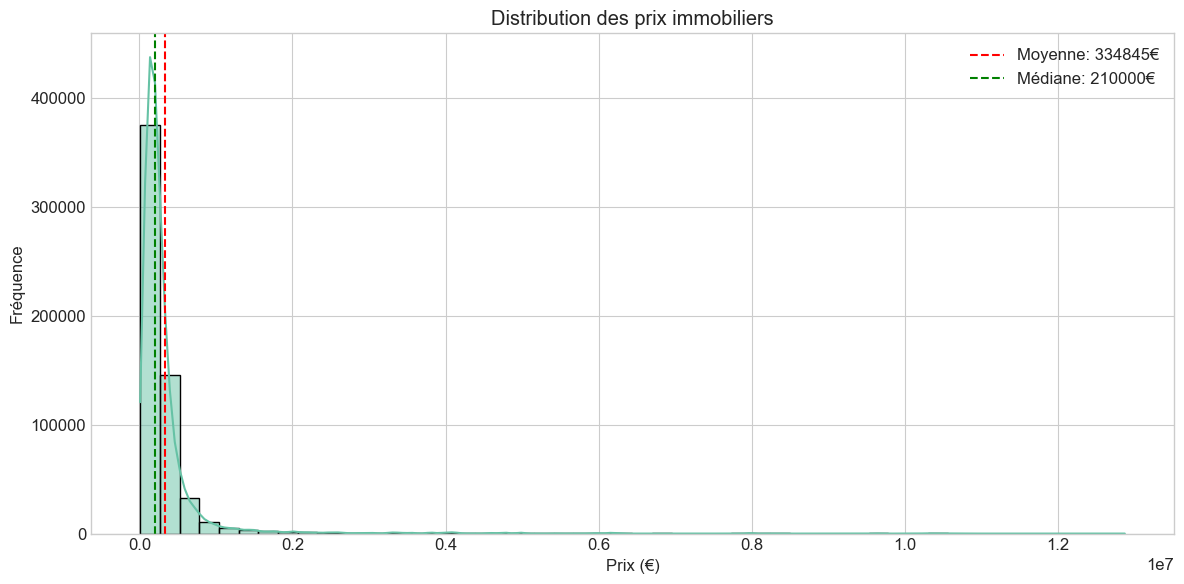

In [ ]:
# Vérification de df_filtered s'il existe et contient des données
if df_filtered is not None and len(df_filtered) > 0:
    plt.figure(figsize=(12, 6))
    sns.histplot(df_filtered['Valeur fonciere'], kde=True, bins=50)
    plt.title('Distribution des prix immobiliers')
    plt.xlabel('Prix (€)')
    plt.ylabel('Fréquence')
    plt.axvline(df_filtered['Valeur fonciere'].mean(), color='red', linestyle='--', 
               label=f'Moyenne: {df_filtered["Valeur fonciere"].mean():.0f}€')
    plt.axvline(df_filtered['Valeur fonciere'].median(), color='green', linestyle='--', 
               label=f'Médiane: {df_filtered["Valeur fonciere"].median():.0f}€')
    plt.legend()
    plt.tight_layout()
    plt.show()
else:
    print("Impossible de créer la visualisation: données non disponibles")

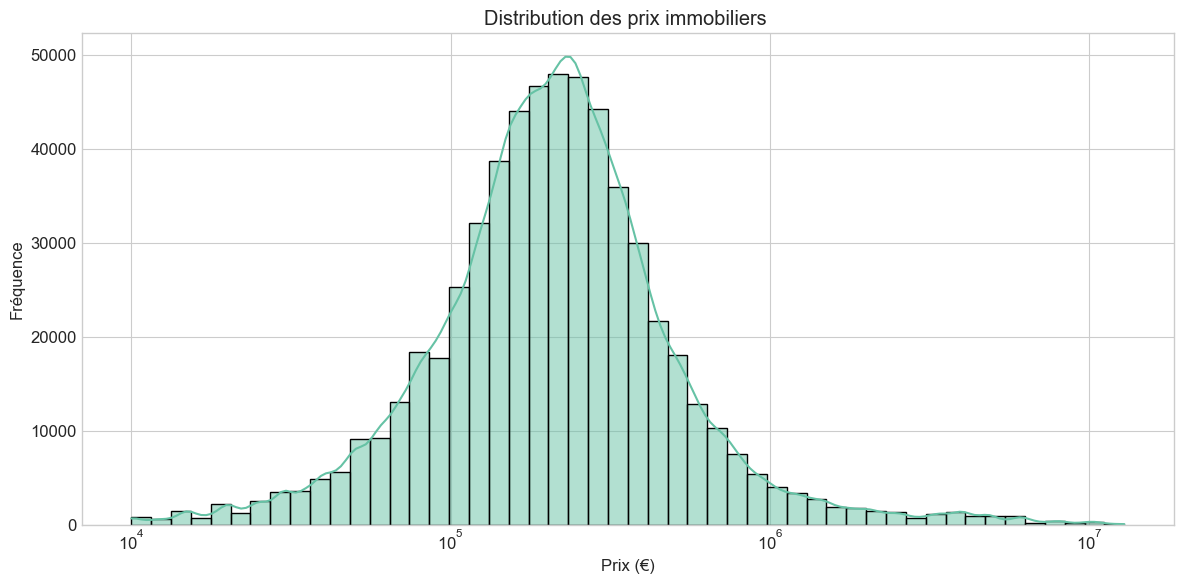

In [ ]:

if df_filtered is not None and len(df_filtered) > 0:
    plt.figure(figsize=(12, 6))
    sns.histplot(df_filtered['Valeur fonciere'], kde=True, bins=50, log_scale=True)
    plt.title('Distribution des prix immobiliers ')
    plt.xlabel('Prix (€)')
    plt.ylabel('Fréquence')
    plt.tight_layout()
    plt.show()

3. Relation entre surface et prix

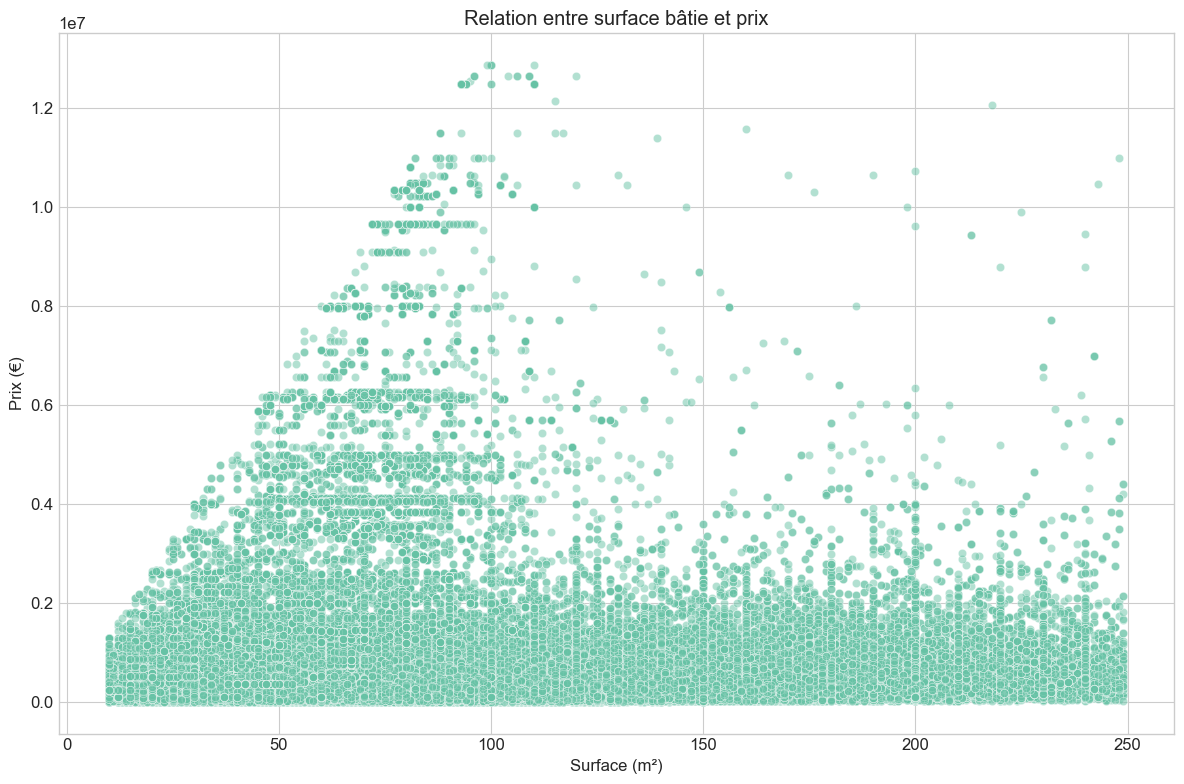

In [ ]:

if df_filtered is not None and 'Surface reelle bati' in df_filtered.columns:
    # Filtrer les valeurs aberrantes
    mask = (df_filtered['Surface reelle bati'] > 0) & (df_filtered['Surface reelle bati'] < df_filtered['Surface reelle bati'].quantile(0.99))
    
    plt.figure(figsize=(12, 8))
    sns.scatterplot(x='Surface reelle bati', y='Valeur fonciere', 
                    data=df_filtered[mask], alpha=0.5)
    plt.title('Relation entre surface bâtie et prix')
    plt.xlabel('Surface (m²)')
    plt.ylabel('Prix (€)')
    plt.tight_layout()
    plt.show()
elif df_filtered is not None:
    print("La colonne 'Surface reelle bati' n'existe pas dans le dataset")

Visualisation des prix par département

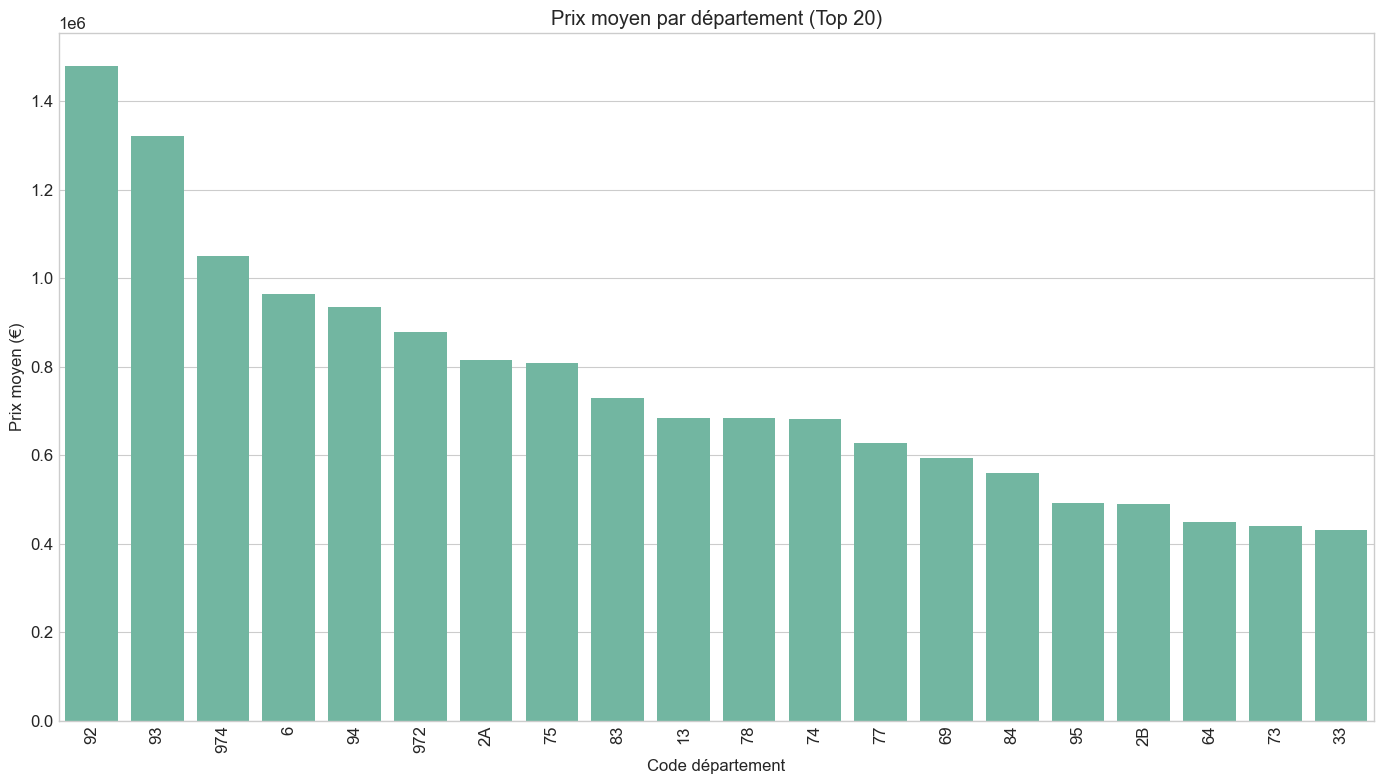

In [14]:
if 'Code departement' in df.columns:  # Notez l'espace au lieu de l'underscore
    # Prix moyen par département
    dept_price = df.groupby('Code departement')['Valeur fonciere'].mean().sort_values(ascending=False)
    
    plt.figure(figsize=(14, 8))
    sns.barplot(x=dept_price.index[:20], y=dept_price.values[:20])  # Top 20 départements
    plt.title('Prix moyen par département (Top 20)')
    plt.xlabel('Code département')
    plt.ylabel('Prix moyen (€)')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()
else:
    print("La colonne 'Code departement' n'existe pas dans le dataset")
    print("Colonnes disponibles:", df.columns.tolist())